In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('output.csv')

# print(df.columns)
grouped = df.groupby(['Latitude', 'Longitude']).mean().reset_index()

# Check the grouped DataFrame
grouped.head()

,Latitude,Longitude,Sample_ID,GSAT_hist_trd_model,GSAT_hist_trd_obs,GSAT_delta_model_near,GSAT_delta_model_mid,GSAT_delta_model_long
0,-87.5,-177.5,124.5,0.223398,0.172426,1.682176,2.289578,3.127312
1,-87.5,-172.5,124.5,0.221088,0.171260,1.682176,2.289578,3.127312
2,-87.5,-167.5,124.5,0.220946,0.169455,1.682176,2.289578,3.127312
3,-87.5,-162.5,124.5,0.220101,0.170257,1.682176,2.289578,3.127312
4,-87.5,-157.5,124.5,0.217131,0.169049,1.682176,2.289578,3.127312


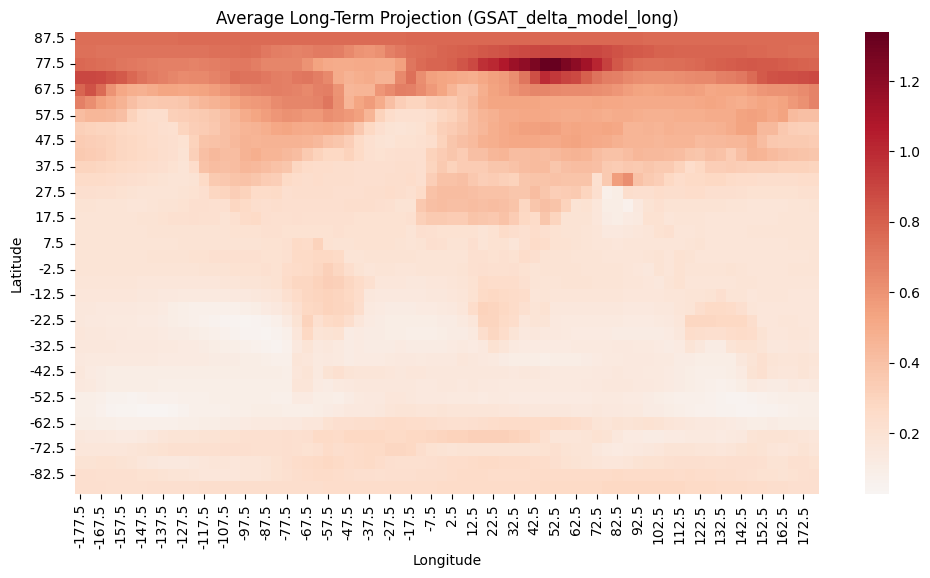

In [25]:
heatmap_data_long = grouped.pivot(index='Latitude', columns='Longitude', values='GSAT_hist_trd_model')

heatmap_data_long = heatmap_data_long.sort_index(ascending=False)

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data_long, cmap='RdBu_r', center=0)
plt.title("Average Long-Term Projection (GSAT_delta_model_long)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

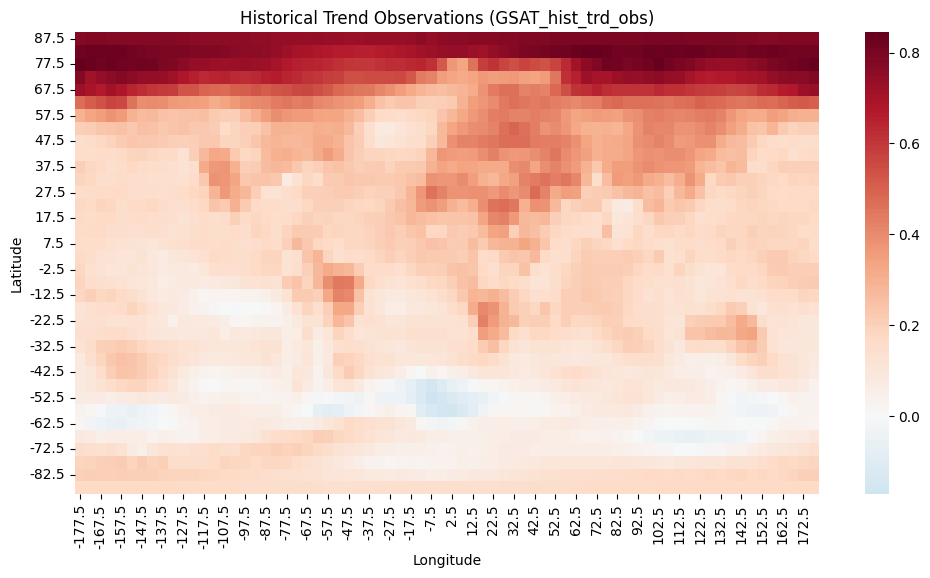

In [26]:
heatmap_data_obs = grouped.pivot(index='Latitude', columns='Longitude', values='GSAT_hist_trd_obs')
heatmap_data_obs = heatmap_data_obs.sort_index(ascending=False)

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data_obs, cmap='RdBu_r', center=0)
plt.title("Historical Trend Observations (GSAT_hist_trd_obs)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [31]:
sorted_long = grouped.sort_values('GSAT_hist_trd_model', ascending=False)

top_10 = sorted_long.head(10)
bottom_10 = sorted_long.tail(10)

print("Top 10 Grid Cells by Average Projected Data:")
print(top_10[['Latitude', 'Longitude', 'GSAT_hist_trd_model']])

print("\nBottom 10 Grid Cells by Average Projected Data:")
print(bottom_10[['Latitude', 'Longitude', 'GSAT_hist_trd_model']])

Top 10 Grid Cells by Average Projected Data:
      Latitude  Longitude  GSAT_hist_trd_model
2422      77.5       52.5             1.338659
2421      77.5       47.5             1.327146
2423      77.5       57.5             1.260819
2420      77.5       42.5             1.258648
2424      77.5       62.5             1.190116
2419      77.5       37.5             1.181882
2418      77.5       32.5             1.140255
2425      77.5       67.5             1.126796
2417      77.5       27.5             1.073988
2426      77.5       72.5             1.021450

Bottom 10 Grid Cells by Average Projected Data:
     Latitude  Longitude  GSAT_hist_trd_model
881     -27.5      -92.5             0.047655
953     -22.5      -92.5             0.047107
952     -22.5      -97.5             0.045219
882     -27.5      -87.5             0.043346
436     -57.5     -157.5             0.040840
437     -57.5     -152.5             0.036422
441     -57.5     -132.5             0.036393
438     -57.5     -14

In [32]:
sorted_long = grouped.sort_values('GSAT_hist_trd_obs', ascending=False)

top_10 = sorted_long.head(10)
bottom_10 = sorted_long.tail(10)

print("Top 10 Grid Cells by Actual Recorded Data:")
print(top_10[['Latitude', 'Longitude', 'GSAT_hist_trd_obs']])

print("\nBottom 10 Grid Cells by Actual Recorded Data:")
print(bottom_10[['Latitude', 'Longitude', 'GSAT_hist_trd_obs']])

Top 10 Grid Cells by Actual Recorded Data:
      Latitude  Longitude  GSAT_hist_trd_obs
2447      77.5      177.5           0.844871
2376      77.5     -177.5           0.843751
2497      82.5       67.5           0.839738
2498      82.5       72.5           0.837629
2432      77.5      102.5           0.837446
2507      82.5      117.5           0.832488
2508      82.5      122.5           0.831527
2505      82.5      107.5           0.831013
2379      77.5     -162.5           0.830665
2499      82.5       77.5           0.830605

Bottom 10 Grid Cells by Actual Recorded Data:
     Latitude  Longitude  GSAT_hist_trd_obs
540     -52.5        2.5          -0.120171
609     -47.5      -12.5          -0.125419
469     -57.5        7.5          -0.129726
537     -52.5      -12.5          -0.130651
466     -57.5       -7.5          -0.135289
610     -47.5       -7.5          -0.149149
539     -52.5       -2.5          -0.152786
467     -57.5       -2.5          -0.152875
468     -57.5      

In [33]:
# Load data
df = pd.read_csv('output.csv')

# Extract unique sample IDs
sample_ids = df['Sample_ID'].unique()
N = len(sample_ids)
print(f"Number of unique Sample_IDs: {N}")

# Dimensions
n_lat = 36
n_lon = 72
n_grid = n_lat * n_lon

# Preallocate arrays to store X, Y, Z for each sample
X_all = np.zeros((N, n_grid))
Z_all = np.zeros((N, n_grid))
# Y is the same for all samples, just store once
Y_fixed = None

for i, sid in enumerate(sample_ids):
    sample_data = df[df['Sample_ID'] == sid]
    
    X_grid = sample_data['GSAT_hist_trd_model'].values.reshape(n_lon, n_lat)
    Z_grid = sample_data['GSAT_delta_model_near'].values.reshape(n_lon, n_lat)
    Y_grid = sample_data['GSAT_hist_trd_obs'].values.reshape(n_lon, n_lat)
    
    # Flatten
    X_all[i, :] = X_grid.flatten()
    Z_all[i, :] = Z_grid.flatten()
    
    if Y_fixed is None:
        Y_fixed = Y_grid.flatten()

# Compute means
mu_X = np.mean(X_all, axis=0)  # mean over samples
mu_Z = np.mean(Z_all, axis=0)

# Compute covariance matrices
# Note: cov(X_all, rowvar=False) computes covariance across columns if rowvar=False
Sigma_X = np.cov(X_all, rowvar=False)  # Cov(X)
Sigma_Z = np.cov(Z_all, rowvar=False)  # Cov(Z)

# Cross-covariance between X and Z
# Need E[(X - mu_X)(Z - mu_Z)^T]
X_centered = X_all - mu_X
Z_centered = Z_all - mu_Z
Sigma_XZ = (X_centered.T @ Z_centered) / (N - 1)  # Cov(X,Z)

# Given Y, find E(Z|Y)
# E(X|Y) = mu_X + 0.5 * (Y_fixed - mu_X)
E_X_given_Y = mu_X + 0.5 * (Y_fixed - mu_X)

# E(Z|Y) = mu_Z + (Sigma_XZ^T * Sigma_X^{-1}) * (E(X|Y)-mu_X)
# We'll need to solve a linear system Sigma_X^{-1}(E(X|Y)-mu_X).
delta_XY = E_X_given_Y - mu_X

# Solve Sigma_X^{-1} * delta_XY
# For large matrices, consider using a solver like np.linalg.solve
inv_Sigma_X = np.linalg.inv(Sigma_X)
term = inv_Sigma_X @ delta_XY

E_Z_given_Y = mu_Z + (Sigma_XZ.T @ term) * 0.5

# Var(Z|Y) = Sigma_Z - 0.5 * Sigma_XZ^T Sigma_X^{-1} Sigma_XZ
Var_Z_given_Y = Sigma_Z - 0.5 * (Sigma_XZ.T @ inv_Sigma_X @ Sigma_XZ)

print("E(Z|Y) computed. Shape:", E_Z_given_Y.shape)
print("Var(Z|Y) computed. Shape:", Var_Z_given_Y.shape)

Number of unique Sample_IDs: 248
E(Z|Y) computed. Shape: (2592,)
Var(Z|Y) computed. Shape: (2592, 2592)


In [35]:
R = 6371e3  # Earth's radius in meters
deg_to_rad = np.pi / 180
lat_grid = np.linspace(-87.5, 87.5, n_lat)  # center latitudes
lon_grid = np.linspace(-177.5, 177.5, n_lon)  # center longitudes

# Edges (assuming equal spacing)
lat_edges = np.linspace(-90, 90, n_lat+1)
lon_edges = np.linspace(-180, 180, n_lon+1)

# Convert to radians
lat_edges_rad = lat_edges * deg_to_rad
lon_edges_rad = lon_edges * deg_to_rad

areas = np.zeros((n_lon, n_lat))
for i in range(n_lon):
    for j in range(n_lat):
        # area element
        dphi = lat_edges_rad[j+1] - lat_edges_rad[j]
        # Difference in sin(lat)
        sin_part = np.sin(lat_edges_rad[j+1]) - np.sin(lat_edges_rad[j])
        
        dlambda = lon_edges_rad[i+1] - lon_edges_rad[i]
        
        cell_area = R**2 * abs(sin_part) * abs(dlambda)
        areas[i,j] = cell_area

# Flatten areas into a vector of length n_grid
areas_vector = areas.flatten()

In [36]:
# Already defined lat_grid, lon_grid as center latitudes and longitudes in degrees

lat_rad = lat_grid * deg_to_rad
lon_rad = lon_grid * deg_to_rad

# Create arrays of all grid cell centers
lats_2d, lons_2d = np.meshgrid(lat_rad, lon_rad)  # shape (n_lon, n_lat)
lats_vec = lats_2d.flatten()
lons_vec = lons_2d.flatten()

def haversine(lat1, lon1, lat2, lon2, R=6371e3):
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

dist_matrix = np.zeros((n_grid, n_grid))
for i in range(n_grid):
    for j in range(i+1, n_grid):
        dist = haversine(lats_vec[i], lons_vec[i], lats_vec[j], lons_vec[j], R)
        dist_matrix[i,j] = dist
        dist_matrix[j,i] = dist

In [ ]:
import cvxpy as cp
import numpy as np

# ----------------------------------
# New Code: Linear Regression with Equi-Sparsity
# ----------------------------------

# Prepare data for regression:
# Assuming Z_all and X_all are already defined
print("Preparing data for regression...")

# Aggregate future responses
Z = Z_all.mean(axis=1)  # For example, average future change across grid boxes
print("Aggregated Z:", Z)

X = X_all
print("Predictor matrix X prepared with shape:", X.shape)

# Assuming areas and dist_matrix are defined
print("Preparing weights and distance matrix...")

# Compute w_jk = 1/d(j,k) for j < k
pairs_j = []
pairs_k = []
w_entries = []
for j in range(n_grid):
    for k in range(j+1, n_grid):
        d_jk = dist_matrix[j, k]
        if d_jk > 0:
            w_jk = 1.0 / d_jk
            pairs_j.append(j)
            pairs_k.append(k)
            w_entries.append(w_jk)

print(f"Computed weights for {len(w_entries)} pairs.")

w_entries = np.array(w_entries)
pairs_j = np.array(pairs_j)
pairs_k = np.array(pairs_k)

# Regularization parameter
lambda_val = 0.1
print(f"Regularization parameter lambda set to: {lambda_val}")

# Define optimization variable
beta = cp.Variable(n_grid)
print(f"Optimization variable beta defined with {n_grid} dimensions.")

# Least squares term
print("Defining the least squares term...")
ls_term = (1/(2*N)) * cp.sum_squares(Z - X @ beta)

# Equi-sparsity penalty
print("Calculating equi-sparsity penalty...")
penalties = []
for idx in range(len(w_entries)):
    if idx % 100000 == 0:  # Print progress every 100 iterations
        print(f"Processing penalty {idx}/{len(w_entries)}")
    j = pairs_j[idx]
    k = pairs_k[idx]
    w_jk = w_entries[idx]
    if idx % 3357935 == 0:
        print("Y")
    if idx % 3357936 == 0:
        print("X")
    penalties.append(w_jk * cp.abs((beta[j]/areas_vector[j]) - (beta[k]/areas_vector[k])))

print("Exited loop.")

penalty_term = lambda_val * cp.sum(penalties)
print("Penalty term calculated.")

# Objective function and problem
print("Setting up the optimization problem...")
obj = cp.Minimize(ls_term + penalty_term)
prob = cp.Problem(obj)

# Solve the problem
print("Solving the optimization problem...")
prob.solve(solver=cp.SCS, verbose=True)

# Print results
print("Regression status:", prob.status)
print("Optimal value:", prob.value)
print("Estimated beta:", beta.value)

Preparing data for regression...
Aggregated Z: [1.48387611 1.63073021 1.64483368 1.50507689 1.46445243 1.49316624
 1.49687671 1.53419138 1.50917053 1.55780833 1.4517915  1.47972333
 1.54433429 1.54917329 1.4590749  1.5524828  1.54878355 1.35209701
 1.59251518 1.49694829 1.63722894 1.46298086 1.32540828 1.4950444
 1.50279621 1.57741637 1.56814818 1.35357022 1.40858326 1.43165213
 1.54690659 1.43788278 1.57272712 1.52739477 1.47967391 1.44410521
 1.56784489 1.42357925 1.55495567 1.41104029 1.53461587 1.40671797
 1.48441488 1.78504349 1.36532557 1.0455002  1.0967043  2.32120359
 2.42378032 2.43930966 2.40022609 2.37436553 2.41477839 2.50132308
 2.31514119 2.48782263 2.42542531 2.46987334 2.43712722 2.44011447
 2.42657216 2.42886127 2.49043351 2.29617483 2.47995691 2.35034861
 2.5185533  2.48245285 2.46705994 2.45918949 2.39767855 2.36964797
 2.39065078 2.47183288 2.3872419  2.43933409 2.40235659 2.30178647
 2.3716852  2.38012582 2.32816208 2.38396354 2.4191407  2.37494954
 2.47557482 2.32

KeyboardInterrupt: 

In [ ]:
beta_grid = beta.value.reshape((72, 36))

plt.figure(figsize=(10, 6))
plt.imshow(beta_grid, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Regression Coefficients')
plt.title('Spatial Distribution of Beta Coefficients')
plt.xlabel('Longitude Index')
plt.ylabel('Latitude Index')
plt.show()

In [ ]:
# Find some way to make a prediction.

# Z_pred = X_new @ beta.value